# Dijkstra

Import libraries

In [99]:
import importlib
import networkx as nx
import matplotlib.pyplot as plt
import math
from or_algorithms import dijkstra as djks
importlib.reload(djks)

<module 'or_algorithms.dijkstra' from '/Users/paulafermincueto/Coding/theORgallery/src/or_algorithms/dijkstra.py'>

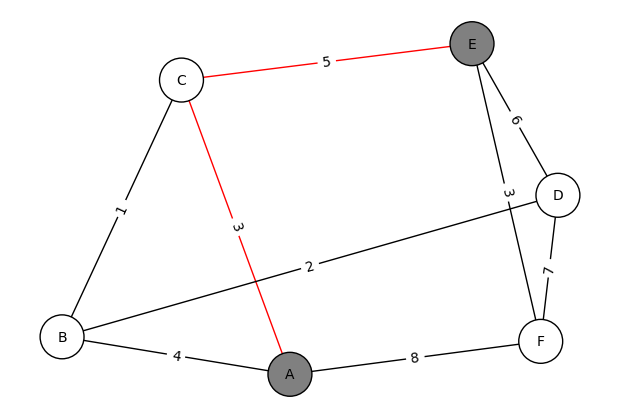


The shortest path from A to E is A-C-E, with a total distance of 8.


In [146]:
# Create a graph
G = nx.Graph()

# Define nodes
nodes = ["A", "B", "C", "D", "E", "F"]
G.add_nodes_from(nodes)

# Define edges with weights
edges = [
    ("A", "B", 4), ("A", "C", 3), ("B", "C", 1),
    ("B", "D", 2), ("C", "E", 5), ("D", "E", 6),
    ("D", "F", 7), ("E", "F", 3), ("A", "F", 8)  
]
G.add_weighted_edges_from(edges)

# Positions for nodes
pos = nx.spring_layout(G)

# Start and End nodes
start, end = "A", "E"

# Find shortest path
distance, shortest_path = djks.solve_shortest_path(G, start, end)

# Edge labels
edge_labels = {(u, v): w for u, v, w in edges}

# Define colors: Start & End are grey, others white
node_colors = ["grey" if node in [start, end] else "white" for node in G.nodes]

plt.figure(figsize=(6, 4))

path_edges = []
for i in range(len(shortest_path) - 1):
    path_edges.append(
        set([shortest_path[i], shortest_path[i + 1]])
    )

edge_colors = ['red' if set([edge[0], edge[1]]) in path_edges else "black" for edge in G.edges]

# Draw the full graph
nx.draw(
    G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors,
    node_size=1000, font_size=10, edgecolors="black", linewidths=1 
)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Show plot
plt.show()

# Print shortest path result
print(f"\nThe shortest path from {start} to {end} is {'-'.join(shortest_path)}, with a total distance of {distance}.")